In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
def data_loading(train_batches, test_batches):
    # Fetch training data: total 60000 samples
        
    trainset = datasets.MNIST('data', train = True, download = False, 
                transform = transforms.Compose([
                transforms.ToTensor()
                ]))
    train_loader = torch.utils.data.DataLoader(trainset, batches = train_batches, shuffle=True)

    testset = datasets.MNIST('data', train = False, download = False, 
                transform = transforms.Compose([
                transforms.ToTensor()
                ]))
    test_loader = torch.utils.data.DataLoader(testset ,batches = test_batches, shuffle=True)

    return (train_loader, test_loader)

In [4]:
class Model1 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

In [5]:
def calculate_loss(model, loader, loss_fn):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data.view(-1, 784))
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [6]:
def trainFunc(model, num_epochs):
    model.train()
    epoch = 0 
    
    df = pd.DataFrame()
    for epoch in range (num_epochs):
        epoch += 1

        for _, (images, labels) in enumerate(train_loader):  
            images, labels = Variable(images),Variable(labels)     
            opt.zero_grad()
            pred = model(images.view(-1, 784))
            loss = loss_fn(pred, labels)
            loss.backward()
            opt.step()

        temp_df = pd.DataFrame()
        for name, parameter in model.named_parameters():
            if 'weight' in name:
                weights = torch.nn.utils.parameters_to_vector(parameter).detach().numpy() 
                temp_df = pd.concat([temp_df, pd.DataFrame(weights).T], axis = 1)
        df = pd.concat([df, temp_df], axis = 0)
        train_loss, train_acc = calculate_loss(M, train_loader, loss_fn)
        test_loss, test_acc = calculate_loss(M, test_loader, loss_fn)

        train_arr_of_losses.append(train_loss)
        test_arr_of_losses.append(test_loss)
        train_acc_arr.append(train_acc)
        test_acc_arr.append(test_acc)

    return df

In [7]:
train_batches = 1000
test_batches = 1000
train_loader, test_loader = data_loading(train_batches, test_batches)
train_arr_of_losses = []
test_arr_of_losses = []
train_acc_arr = []
test_acc_arr = []

In [8]:
epochs_maxs = 45
all_df = pd.DataFrame()
columns=["x","y","Times"]

loss_fn = nn.CrossEntropyLoss()

for count in range(8):
    print("Time: "+str(count))
    M = Model1()
    opt = torch.optim.Adam(M.parameters(),lr = 0.0004, weight_decay=1e-4)
    model_name1 = "Times: "+str(count)    
    temp_df = trainFunc(M, epochs_maxs)

    all_df = pd.concat([all_df, temp_df], ignore_index=True)

Time: 0
Time: 1
Time: 2
Time: 3
Time: 4
Time: 5
Time: 6
Time: 7


In [9]:
df = all_df
df = np.array(df)
pca = PCA(n_components=2)
new_data = pca.fit_transform(df)

In [10]:
df = pd.DataFrame(new_data, columns=['x','y'])
df['Accuracy'] = train_acc_arr
df['Loss'] = train_arr_of_losses
final_df = df.iloc[::3, :]

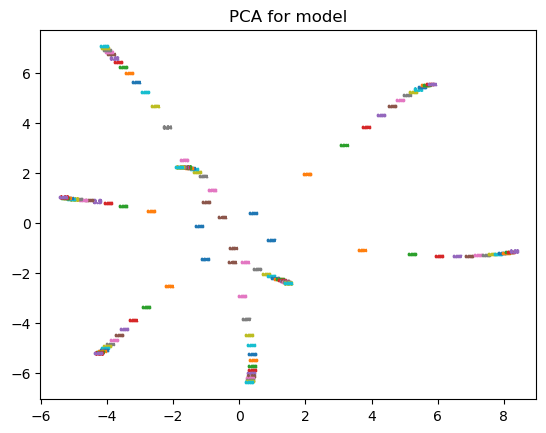

In [11]:
for i in range(120):
    m = list(final_df['Accuracy'])[i]
    plt.scatter(final_df['x'][i*3], final_df['y'][i*3], marker = f'${m}$')
    plt.title("PCA for model")

In [12]:
layer_1 = all_df.iloc[ : , 0:7840]

In [13]:
df = layer_1
df = np.array(df)
pca = PCA(n_components=2)
new_data = pca.fit_transform(df)

In [14]:
df = pd.DataFrame(new_data, columns=['x','y'])
df['Accuracy'] = train_acc_arr
df['Loss'] = train_arr_of_losses
final_df = df.iloc[::3, :]

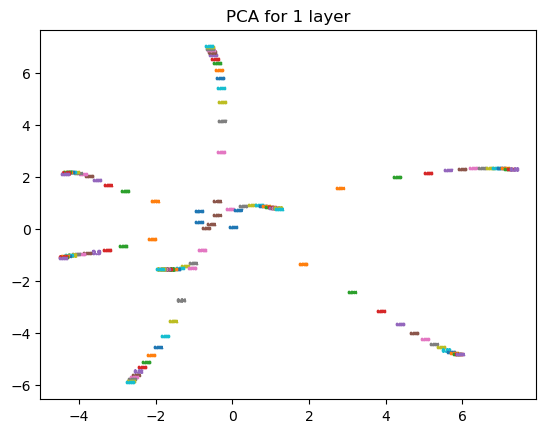

In [15]:
for i in range(120):
    m = list(final_df['Accuracy'])[i]
    plt.scatter(final_df['x'][i*3], final_df['y'][i*3], marker = f'${m}$')
    plt.title("PCA for 1 layer")